In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRFClassifier

Datatset
This dataset is obtained from Kaggle: Heart Failure Prediction Dataset
Context
Cardiovascular disease (CVDs) is the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management.
This dataset contains 11 features that can be used to predict possible heart disease.
Let's train a machine learning model to assist with diagnosing this disease.
Attribute Information
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]




Let's now load the dataset. As we can see above, the variables:

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope

In [8]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
categorical_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]
#help(pd.get_dummies)

In [10]:
df=pd.get_dummies(df,prefix=categorical_variables,columns=categorical_variables)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [12]:
features=[x for x in (df.columns) if x!="HeartDisease"]
print(features)
print(len(features))

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']
20


then we will separate data using sklern to test the diagnosis of the algoritm
X_train ,X_crossvalidation

In [15]:
print(df.shape[0])

918


In [16]:
X_train,X_cv,y_train,y_cv=train_test_split(df[features],df["HeartDisease"],train_size=.8,random_state=20)
print(X_train.shape)
print(X_cv.shape)


(734, 20)
(184, 20)


The hyperparameters we will use and investigate here are:

min_samples_split: The minimum number of samples required to split an internal node.
Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
max_depth: The maximum depth of the tree.
Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [30]:
min_samples_split=[2,10,30,50,100,200,300,500,700]
max_depth_list=[1,2,4,8,16,32,64,128]

[1.0, 0.9264305177111717, 0.888283378746594, 0.8719346049046321, 0.8664850136239782, 0.8201634877384196, 0.8133514986376021, 0.8133514986376021, 0.8133514986376021]
[0.7663043478260869, 0.8206521739130435, 0.8260869565217391, 0.8206521739130435, 0.8532608695652174, 0.8152173913043478, 0.8152173913043478, 0.8152173913043478, 0.8152173913043478]


<function matplotlib.pyplot.show(close=None, block=None)>

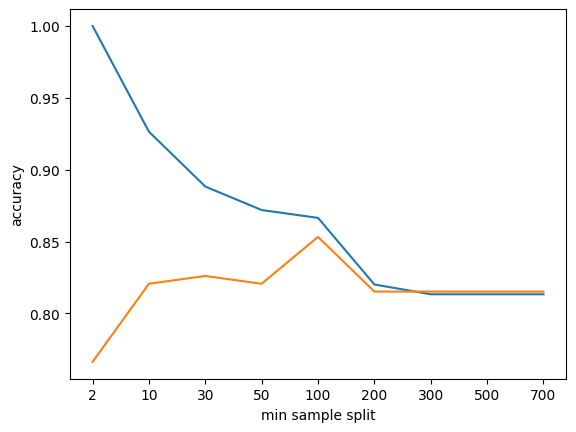

In [31]:
accurancy_list_train=[]
accurancy_list_cv=[]
for i in min_samples_split:
    model=DecisionTreeClassifier(min_samples_split=i,random_state=20).fit(X_train,y_train)
    y1=model.predict(X_train)
    y2=model.predict(X_cv)
    accurancy_list_train.append(accuracy_score(y1,y_train))
    accurancy_list_cv.append(accuracy_score(y2,y_cv))
print (accurancy_list_train)
print(accurancy_list_cv)    
plt.xlabel("min sample split")
plt.ylabel("accuracy")
plt.xticks(ticks = range(len(min_samples_split )),labels=min_samples_split)
plt.plot(accurancy_list_train)
plt.plot(accurancy_list_cv)

plt.show

as you see te overfitteng  reduced from 50 to 100

In [37]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 100,
                                             max_depth = 3,
                                             random_state = 20).fit(X_train,y_train)

In [39]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_cv),y_cv):.4f}")

Metrics train:
	Accuracy score: 0.8624
Metrics validation:
	Accuracy score: 0.8587


************again but with randomforest***********

[0.8913043478260869, 0.8858695652173914, 0.875, 0.8695652173913043, 0.8532608695652174, 0.8532608695652174, 0.8478260869565217, 0.5380434782608695, 0.5380434782608695]
[1.0, 0.9264305177111717, 0.885558583106267, 0.8746594005449592, 0.8542234332425068, 0.8501362397820164, 0.8433242506811989, 0.5572207084468664, 0.5572207084468664]


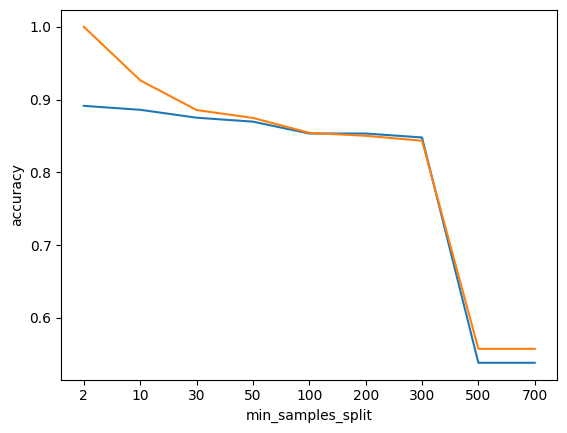

In [42]:
accurancy_list_train=[]
accurancy_list_cv=[]
for i in min_samples_split:
    model=RandomForestClassifier(min_samples_split=i,random_state=20).fit(X_train,y_train)
    y1=model.predict(X_train)
    y2=model.predict(X_cv)
    accurancy_list_train.append(accuracy_score(y1,y_train))
    accurancy_list_cv.append(accuracy_score(y2,y_cv))
print(accurancy_list_cv)
print(accurancy_list_train)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")    
plt.xticks(ticks=range(len(min_samples_split)),labels=min_samples_split)
plt.plot(accurancy_list_cv)
plt.plot(accurancy_list_train)

[0.8532608695652174, 0.8641304347826086, 0.8695652173913043, 0.8858695652173914, 0.8913043478260869, 0.8913043478260869, 0.8913043478260869, 0.8913043478260869]
[0.8433242506811989, 0.8596730245231607, 0.8828337874659401, 0.9645776566757494, 1.0, 1.0, 1.0, 1.0]


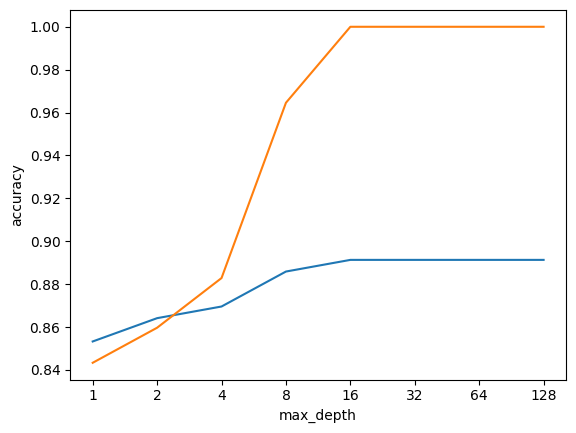

In [44]:
accurancy_list_train=[]
accurancy_list_cv=[]
for i in max_depth_list:
    model=RandomForestClassifier(max_depth=i,random_state=20).fit(X_train,y_train)
    y1=model.predict(X_train)
    y2=model.predict(X_cv)
    accurancy_list_train.append(accuracy_score(y1,y_train))
    accurancy_list_cv.append(accuracy_score(y2,y_cv))
print(accurancy_list_cv)
print(accurancy_list_train)
plt.xlabel("max_depth")
plt.ylabel("accuracy")    
plt.xticks(ticks=range(len(max_depth_list)),labels=max_depth_list)
plt.plot(accurancy_list_cv)
plt.plot(accurancy_list_train)

[0.8913043478260869, 0.8858695652173914, 0.8913043478260869, 0.9021739130434783, 0.8858695652173914]
[0.9877384196185286, 1.0, 1.0, 1.0, 1.0]


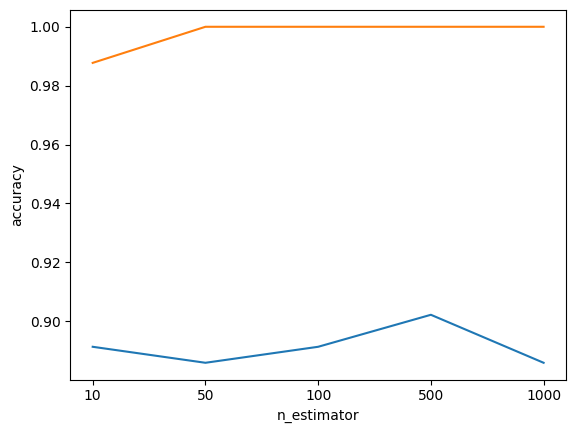

In [48]:
n_estimators_list = [10,50,100,500,1000]
accurancy_list_train=[]
accurancy_list_cv=[]
for i in n_estimators_list:
    model=RandomForestClassifier(n_estimators=i,random_state=20).fit(X_train,y_train)
    y1=model.predict(X_train)
    y2=model.predict(X_cv)
    accurancy_list_train.append(accuracy_score(y1,y_train))
    accurancy_list_cv.append(accuracy_score(y2,y_cv))
print(accurancy_list_cv)
print(accurancy_list_train)
plt.xlabel("n_estimator")
plt.ylabel("accuracy")    
plt.xticks(ticks=range(len(n_estimators_list)),labels=n_estimators_list)
plt.plot(accurancy_list_cv)
plt.plot(accurancy_list_train)

In [54]:
randomforest_model=RandomForestClassifier(max_depth=16,min_samples_split=10,n_estimators=500).fit(X_train,y_train)

In [55]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(randomforest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(randomforest_model.predict(X_cv),y_cv):.4f}")

Metrics train:
	Accuracy score: 0.9251
Metrics test:
	Accuracy score: 0.8913


using XGboost 

In [ ]:
model=XGBRFClassifier().fit(X_train,y_train)
